# Лабораторная работа №2
## Код для моделирования и визуализации

### Федоров Александр


## Импорты


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon
import seaborn as sns

# Настройка для красивого отображения
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# Для воспроизводимости
np.random.seed(42)


## Задание 1: Распределение $f_\xi(x) = \theta^2 x e^{-\theta x}$


### (a) Аналитические значения

Для гамма-распределения с параметрами $\alpha = 2$, $\beta = \theta$:
- $E[\xi] = \frac{2}{\theta}$
- $D[\xi] = \frac{2}{\theta^2}$
- $E[\xi^2] = \frac{6}{\theta^2}$
- $(E[\xi])^2 = \frac{4}{\theta^2}$


In [14]:
# Параметры theta
thetas = [0.5, 2, 8]

# Аналитические значения
def analytical_values(theta):
    E_xi = 2 / theta
    D_xi = 2 / (theta**2)
    E_xi_sq = 6 / (theta**2)
    E_xi_squared = (2 / theta)**2
    return E_xi, D_xi, E_xi_sq, E_xi_squared

# Выводим таблицу аналитических значений
print("Аналитические значения:")
print("\n" + "="*80)
print(f"{'theta':<10} {'E[xi]':<15} {'D[xi]':<15} {'E[xi^2]':<15} {'(E[xi])^2':<15}")
print("="*80)
for theta in thetas:
    E_xi, D_xi, E_xi_sq, E_xi_sq_val = analytical_values(theta)
    print(f"{theta:<10.1f} {E_xi:<15.6f} {D_xi:<15.6f} {E_xi_sq:<15.6f} {E_xi_sq_val:<15.6f}")


Аналитические значения:

theta      E[xi]           D[xi]           E[xi^2]         (E[xi])^2      
0.5        4.000000        8.000000        24.000000       16.000000      
2.0        1.000000        0.500000        1.500000        1.000000       
8.0        0.250000        0.031250        0.093750        0.062500       


### (b) Моделирование и визуализация оценок


In [15]:
# Размеры выборок: k ∈ {2^4, 2^5, ..., 2^15}
k_values = [2**i for i in range(4, 16)]

# Функция для вычисления оценок
def compute_estimates(sample):
    E_hat = np.mean(sample)
    D_hat = np.var(sample, ddof=0)  # Смещенная оценка дисперсии
    E_sq_hat = np.mean(sample**2)
    E_squared_hat = (np.mean(sample))**2
    return E_hat, D_hat, E_sq_hat, E_squared_hat

# Генерация выборок и вычисление оценок для каждого theta
results = {theta: {'k': [], 'E_hat': [], 'D_hat': [], 'E_sq_hat': [], 'E_squared_hat': []} 
            for theta in thetas}

for theta in thetas:
    # Параметры гамма-распределения: shape=2, scale=1/theta
    dist = gamma(a=2, scale=1/theta)
    
    for k in k_values:
        sample = dist.rvs(size=k)
        E_hat, D_hat, E_sq_hat, E_squared_hat = compute_estimates(sample)
        
        results[theta]['k'].append(k)
        results[theta]['E_hat'].append(E_hat)
        results[theta]['D_hat'].append(D_hat)
        results[theta]['E_sq_hat'].append(E_sq_hat)
        results[theta]['E_squared_hat'].append(E_squared_hat)


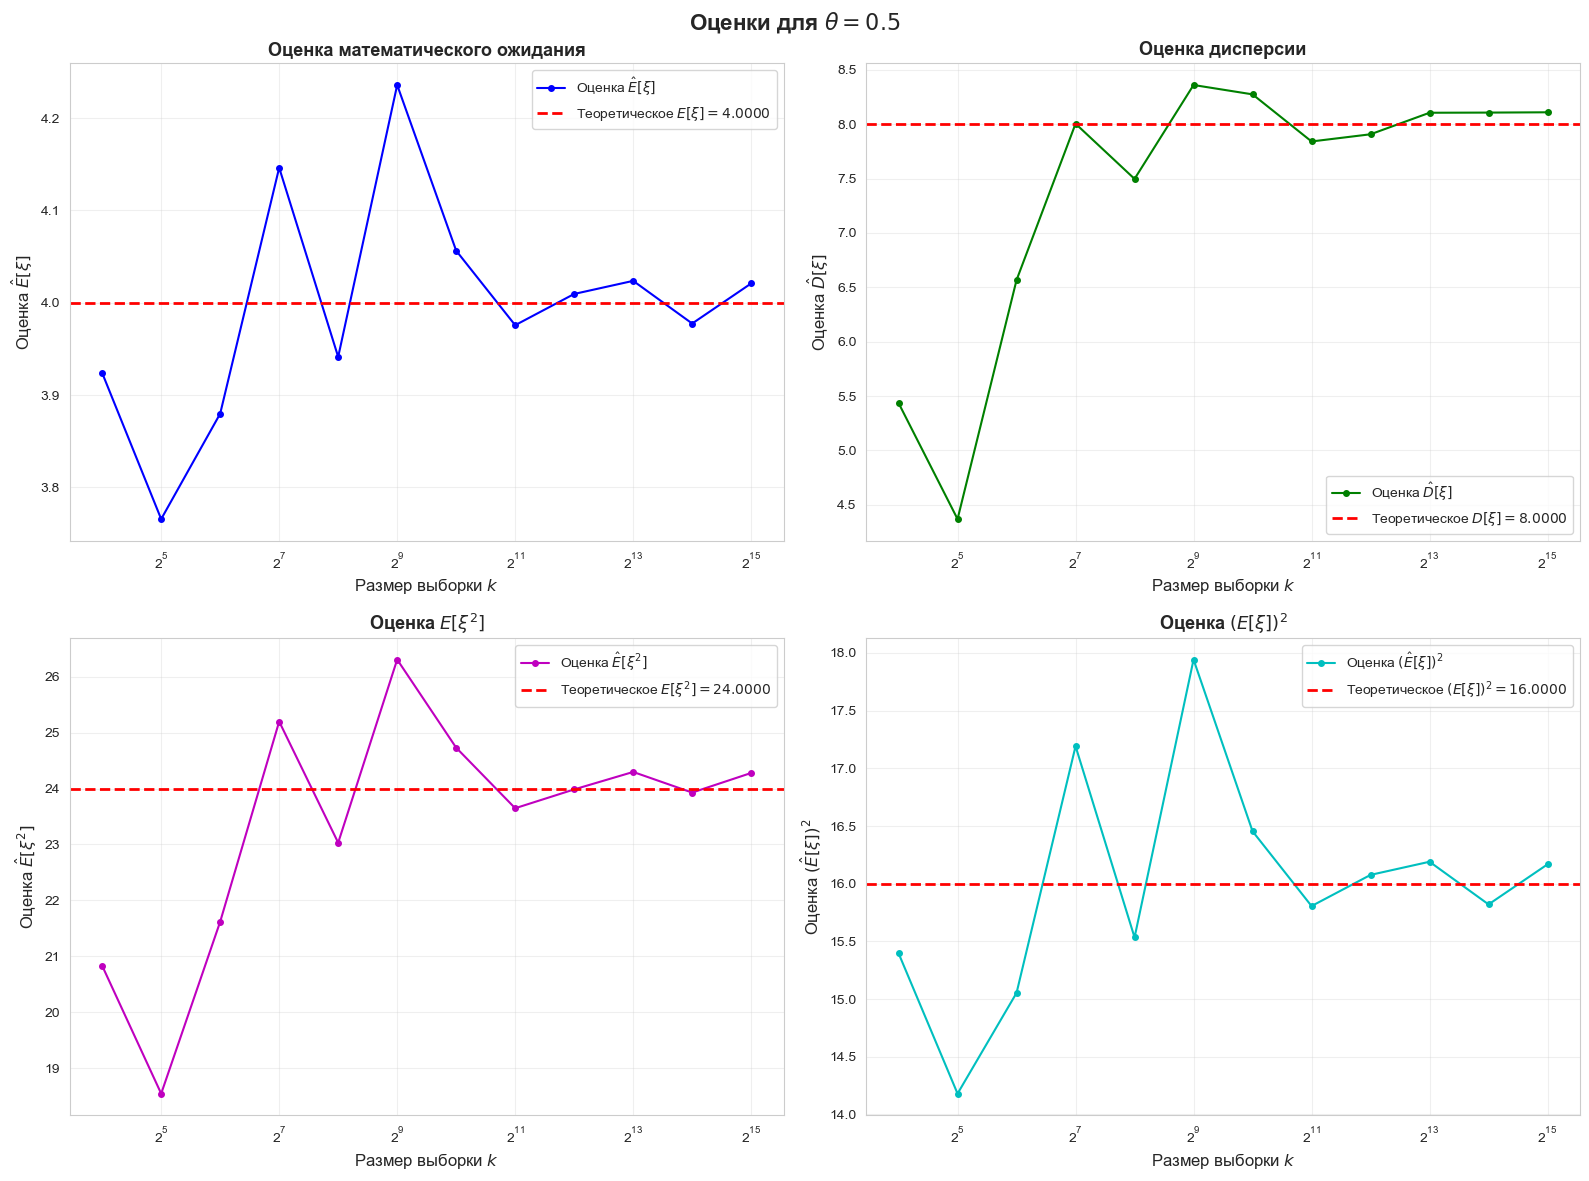

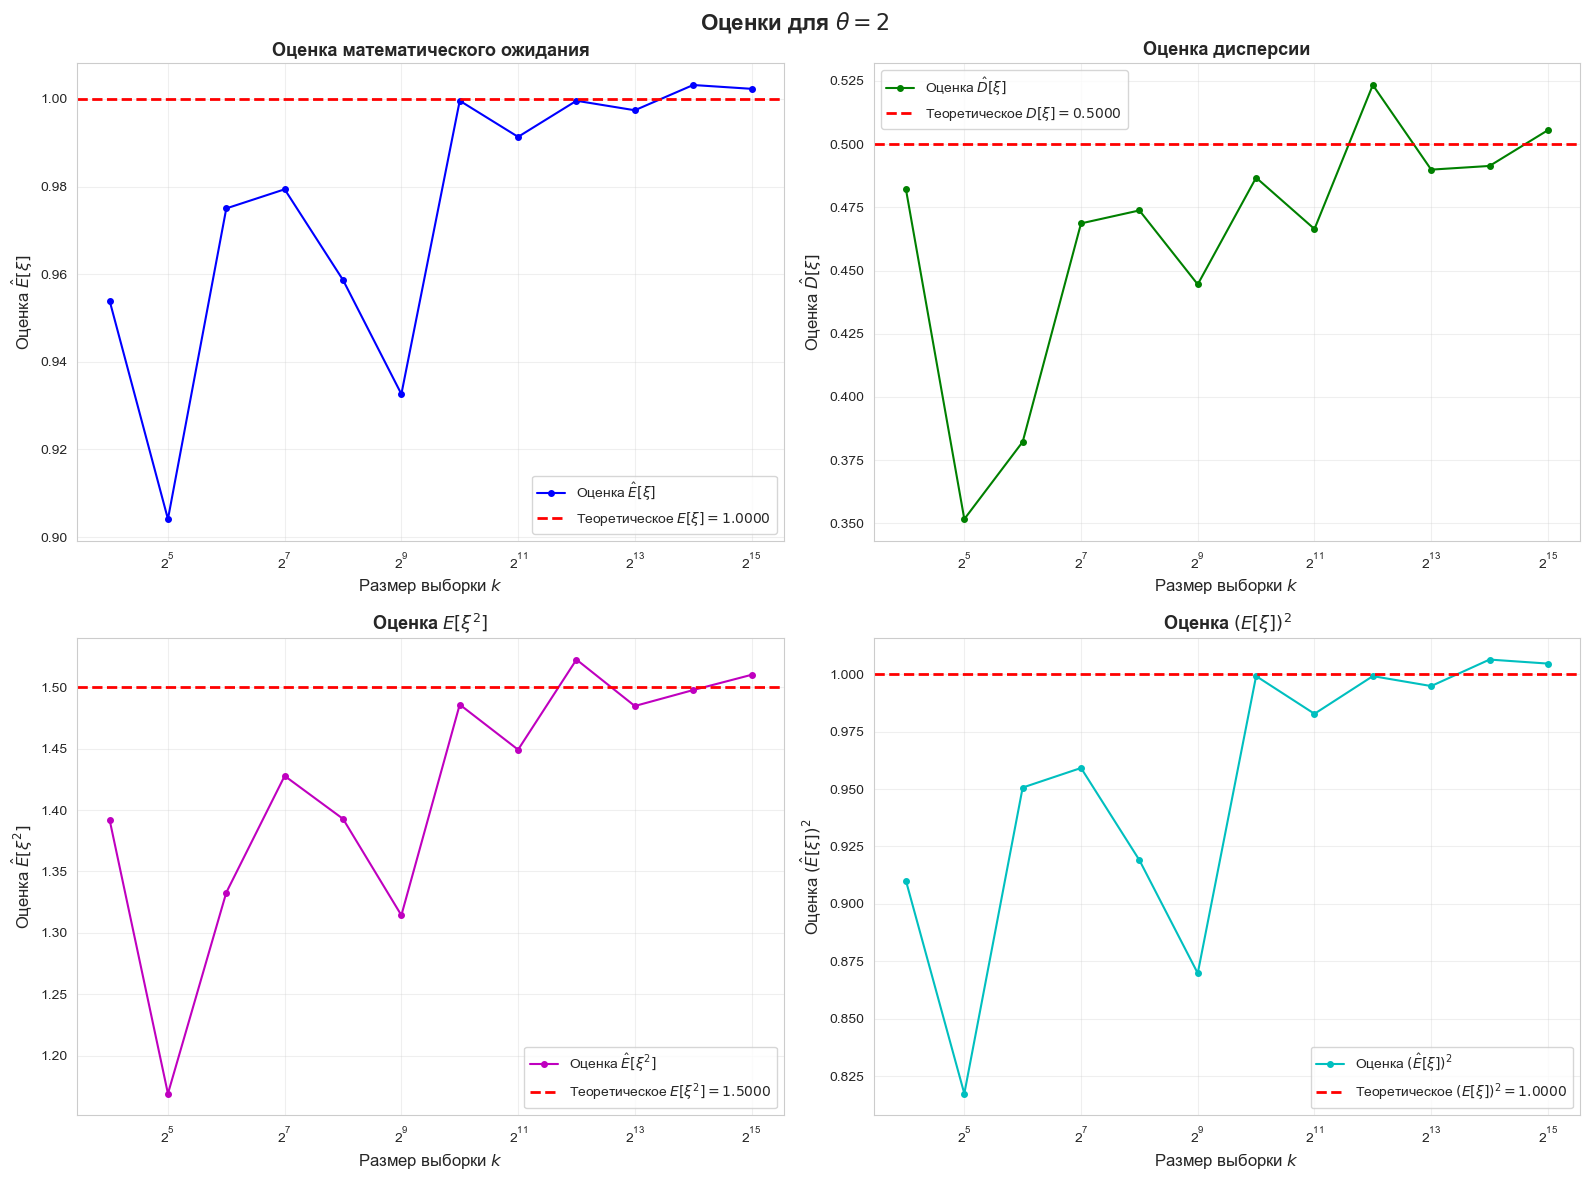

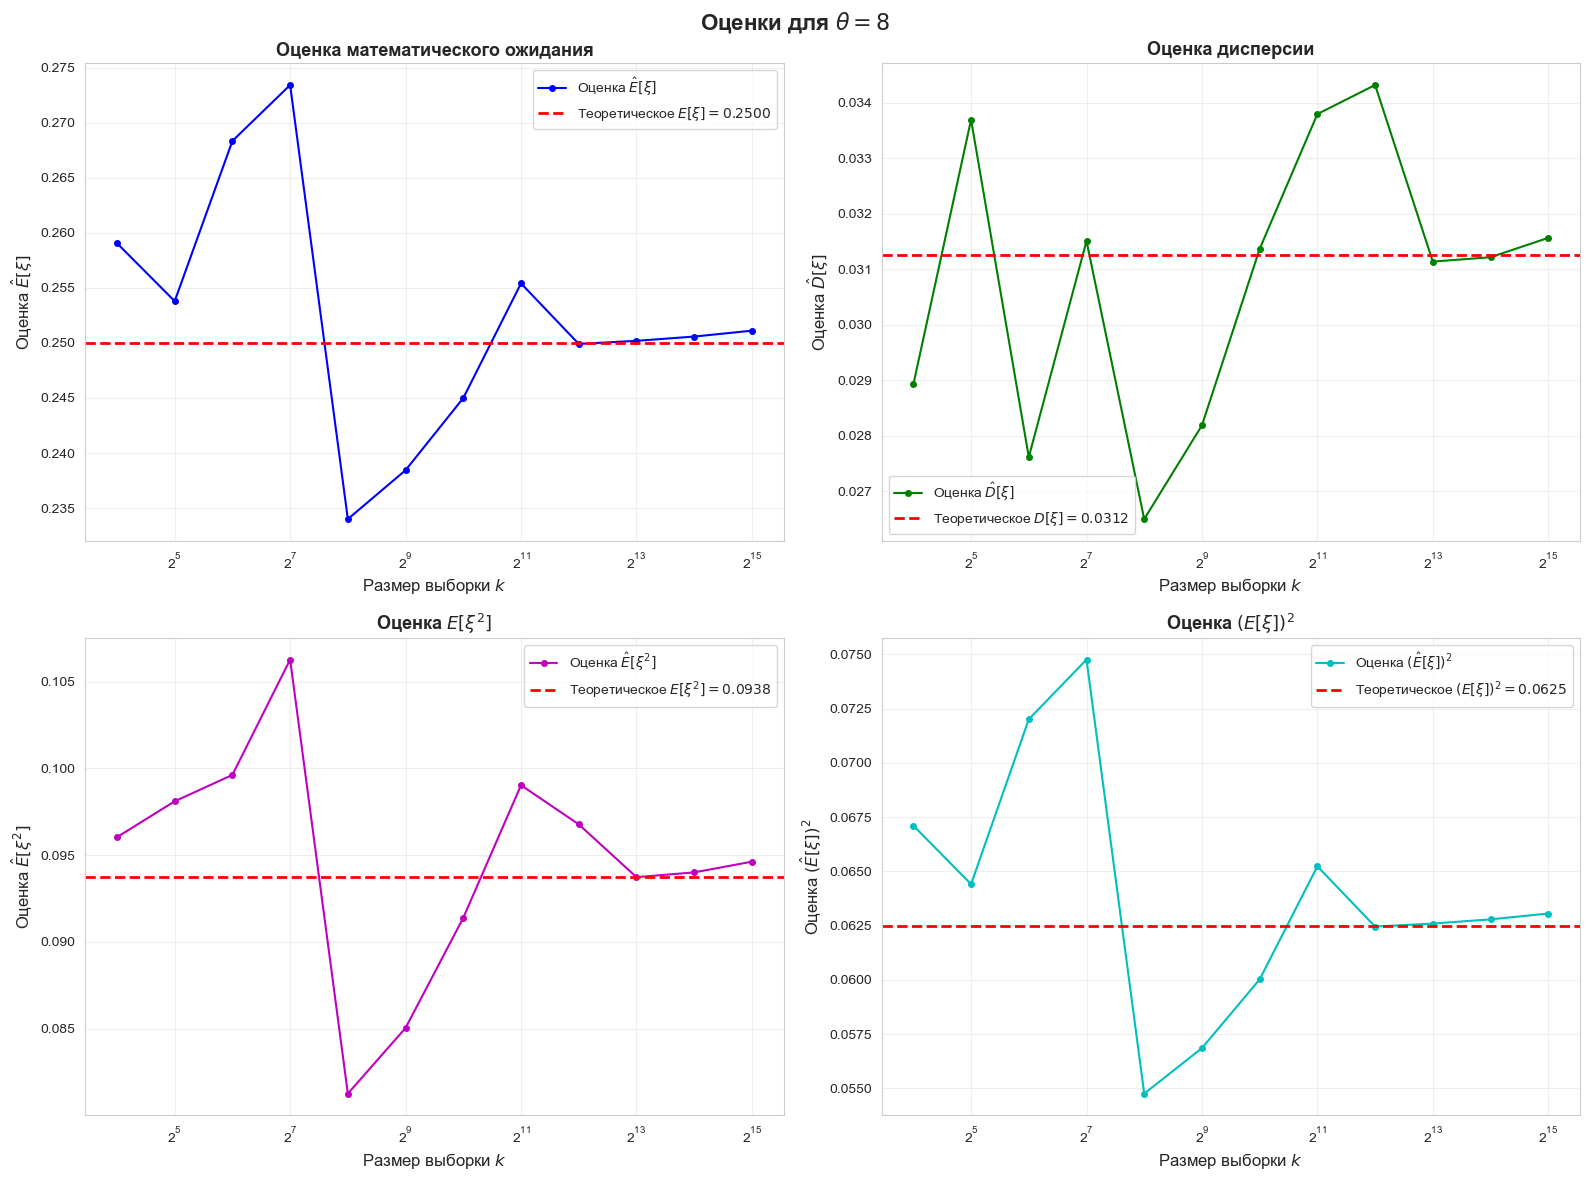

In [16]:
# Построение графиков для каждого theta
for theta in thetas:
    E_xi, D_xi, E_xi_sq, E_xi_sq_val = analytical_values(theta)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Оценки для $\\theta = {theta}$', fontsize=16, fontweight='bold')
    
    k_vals = results[theta]['k']
    
    # График 1: Оценка математического ожидания
    ax1 = axes[0, 0]
    ax1.plot(k_vals, results[theta]['E_hat'], 'b-o', markersize=4, label='Оценка $\\hat{E}[\\xi]$')
    ax1.axhline(y=E_xi, color='r', linestyle='--', linewidth=2, label=f'Теоретическое $E[\\xi] = {E_xi:.4f}$')
    ax1.set_xlabel('Размер выборки $k$', fontsize=12)
    ax1.set_ylabel('Оценка $\\hat{E}[\\xi]$', fontsize=12)
    ax1.set_title('Оценка математического ожидания', fontsize=13, fontweight='bold')
    ax1.set_xscale('log', base=2)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    
    # График 2: Оценка дисперсии
    ax2 = axes[0, 1]
    ax2.plot(k_vals, results[theta]['D_hat'], 'g-o', markersize=4, label='Оценка $\\hat{D}[\\xi]$')
    ax2.axhline(y=D_xi, color='r', linestyle='--', linewidth=2, label=f'Теоретическое $D[\\xi] = {D_xi:.4f}$')
    ax2.set_xlabel('Размер выборки $k$', fontsize=12)
    ax2.set_ylabel('Оценка $\\hat{D}[\\xi]$', fontsize=12)
    ax2.set_title('Оценка дисперсии', fontsize=13, fontweight='bold')
    ax2.set_xscale('log', base=2)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)
    
    # График 3: Оценка E[xi^2]
    ax3 = axes[1, 0]
    ax3.plot(k_vals, results[theta]['E_sq_hat'], 'm-o', markersize=4, label='Оценка $\\hat{E}[\\xi^2]$')
    ax3.axhline(y=E_xi_sq, color='r', linestyle='--', linewidth=2, label=f'Теоретическое $E[\\xi^2] = {E_xi_sq:.4f}$')
    ax3.set_xlabel('Размер выборки $k$', fontsize=12)
    ax3.set_ylabel('Оценка $\\hat{E}[\\xi^2]$', fontsize=12)
    ax3.set_title('Оценка $E[\\xi^2]$', fontsize=13, fontweight='bold')
    ax3.set_xscale('log', base=2)
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=10)
    
    # График 4: Оценка (E[xi])^2
    ax4 = axes[1, 1]
    ax4.plot(k_vals, results[theta]['E_squared_hat'], 'c-o', markersize=4, label='Оценка $(\\hat{E}[\\xi])^2$')
    ax4.axhline(y=E_xi_sq_val, color='r', linestyle='--', linewidth=2, label=f'Теоретическое $(E[\\xi])^2 = {E_xi_sq_val:.4f}$')
    ax4.set_xlabel('Размер выборки $k$', fontsize=12)
    ax4.set_ylabel('Оценка $(\\hat{E}[\\xi])^2$', fontsize=12)
    ax4.set_title('Оценка $(E[\\xi])^2$', fontsize=13, fontweight='bold')
    ax4.set_xscale('log', base=2)
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'lab_2_task1_theta_{theta}.png', dpi=150, bbox_inches='tight')
    plt.show()


## Задание 2: Сдвинутое экспоненциальное распределение


### (a) Аналитические значения

Для $f_\xi^{\lambda,a}(x) = \lambda e^{-\lambda(x-a)}$ при $x \geq a$, где $(\lambda, a) = (2, 2)$:
- Мода: $\text{Mode}[\xi] = a = 2$
- Математическое ожидание: $E[\xi] = a + \frac{1}{\lambda} = 2 + 0.5 = 2.5$
- Медиана: $\text{Med}[\xi] = a + \frac{\ln(2)}{\lambda} = 2 + \frac{\ln(2)}{2} \approx 2.3466$


In [17]:
# Параметры
lambda_val = 2
a = 2

# Аналитические значения
mode_analytical = a
E_analytical = a + 1/lambda_val
median_analytical = a + np.log(2)/lambda_val

print(f"Аналитические значения:")
print(f"Мода: {mode_analytical}")
print(f"Математическое ожидание: {E_analytical}")
print(f"Медиана: {median_analytical:.6f}")


Аналитические значения:
Мода: 2
Математическое ожидание: 2.5
Медиана: 2.346574


### (b) Генерация выборок и вычисление оценок


In [18]:
# Генерация выборок
n_large = 10000
n_small = 20

sample_large = a + expon.rvs(scale=1/lambda_val, size=n_large)
sample_small = a + expon.rvs(scale=1/lambda_val, size=n_small)


def compute_estimates_shifted_exp(sample):
    mode_est = np.min(sample) 
    E_est = np.mean(sample)
    median_est = np.median(sample)
    return mode_est, E_est, median_est


mode_large, E_large, median_large = compute_estimates_shifted_exp(sample_large)
mode_small, E_small, median_small = compute_estimates_shifted_exp(sample_small)

print(f"Оценки для большой выборки (n={n_large}):")
print(f"  Мода: {mode_large:.6f} (теоретическая: {mode_analytical})")
print(f"  Математическое ожидание: {E_large:.6f} (теоретическое: {E_analytical})")
print(f"  Медиана: {median_large:.6f} (теоретическая: {median_analytical:.6f})")
print(f"\nОценки для маленькой выборки (n={n_small}):")
print(f"  Мода: {mode_small:.6f} (теоретическая: {mode_analytical})")
print(f"  Математическое ожидание: {E_small:.6f} (теоретическое: {E_analytical})")
print(f"  Медиана: {median_small:.6f} (теоретическая: {median_analytical:.6f})")


Оценки для большой выборки (n=10000):
  Мода: 2.000011 (теоретическая: 2)
  Математическое ожидание: 2.500735 (теоретическое: 2.5)
  Медиана: 2.353791 (теоретическая: 2.346574)

Оценки для маленькой выборки (n=20):
  Мода: 2.028529 (теоретическая: 2)
  Математическое ожидание: 2.395598 (теоретическое: 2.5)
  Медиана: 2.405078 (теоретическая: 2.346574)


### (c) Визуализация: гистограммы и вертикальные линии


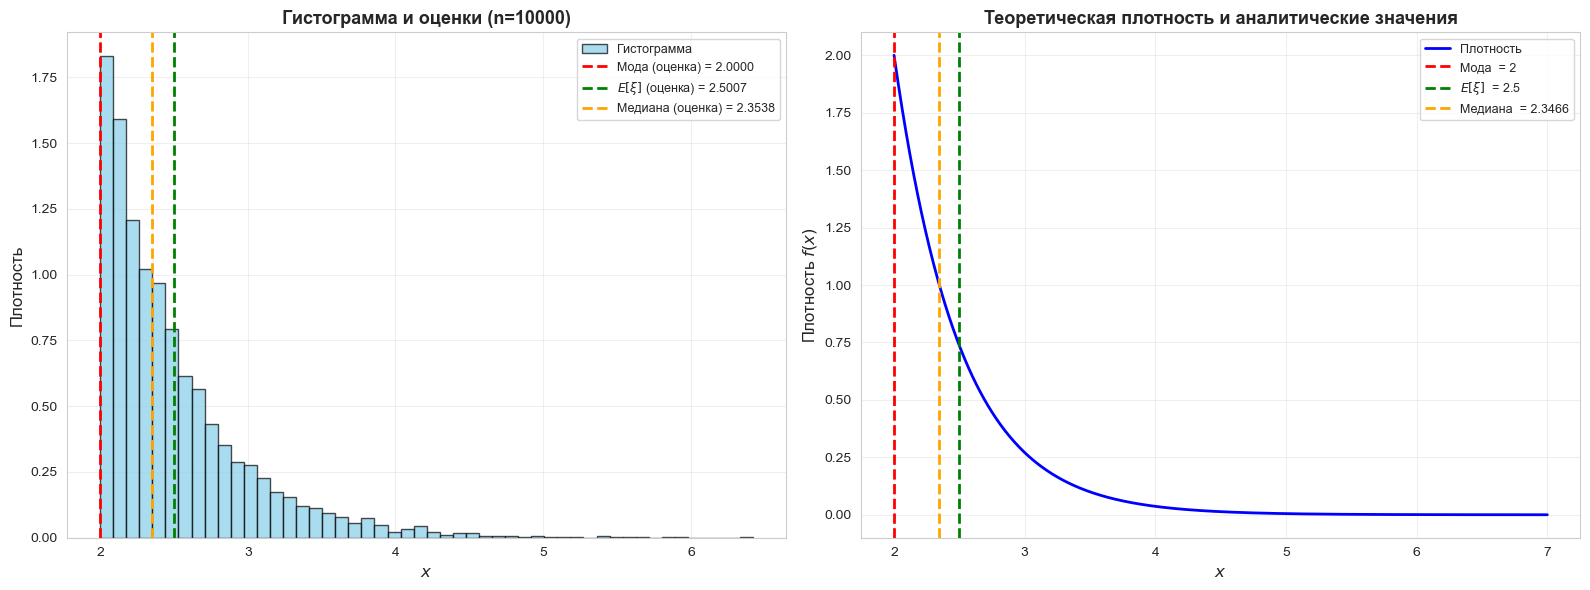

In [19]:
# Функция плотности для построения графика
def pdf_shifted_exp(x, lambda_val, a):
    return lambda_val * np.exp(-lambda_val * (x - a)) * (x >= a)

# Построение графиков для большой выборки
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Гистограмма с оценками
ax1 = axes[0]
ax1.hist(sample_large, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Гистограмма')
ax1.axvline(mode_large, color='red', linestyle='--', linewidth=2, label=f'Мода (оценка) = {mode_large:.4f}')
ax1.axvline(E_large, color='green', linestyle='--', linewidth=2, label=f'$E[\\xi]$ (оценка) = {E_large:.4f}')
ax1.axvline(median_large, color='orange', linestyle='--', linewidth=2, label=f'Медиана (оценка) = {median_large:.4f}')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('Плотность', fontsize=12)
ax1.set_title(f'Гистограмма и оценки (n={n_large})', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# График 2: Теоретическая плотность с аналитическими значениями
ax2 = axes[1]
x_plot = np.linspace(a, a + 5, 1000)
y_plot = pdf_shifted_exp(x_plot, lambda_val, a)
ax2.plot(x_plot, y_plot, 'b-', linewidth=2, label='Плотность')
ax2.axvline(mode_analytical, color='red', linestyle='--', linewidth=2, label=f'Мода  = {mode_analytical}')
ax2.axvline(E_analytical, color='green', linestyle='--', linewidth=2, label=f'$E[\\xi]$  = {E_analytical}')
ax2.axvline(median_analytical, color='orange', linestyle='--', linewidth=2, label=f'Медиана  = {median_analytical:.4f}')
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('Плотность $f(x)$', fontsize=12)
ax2.set_title('Теоретическая плотность и аналитические значения', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab_2_task2_large.png', dpi=150, bbox_inches='tight')
plt.show()


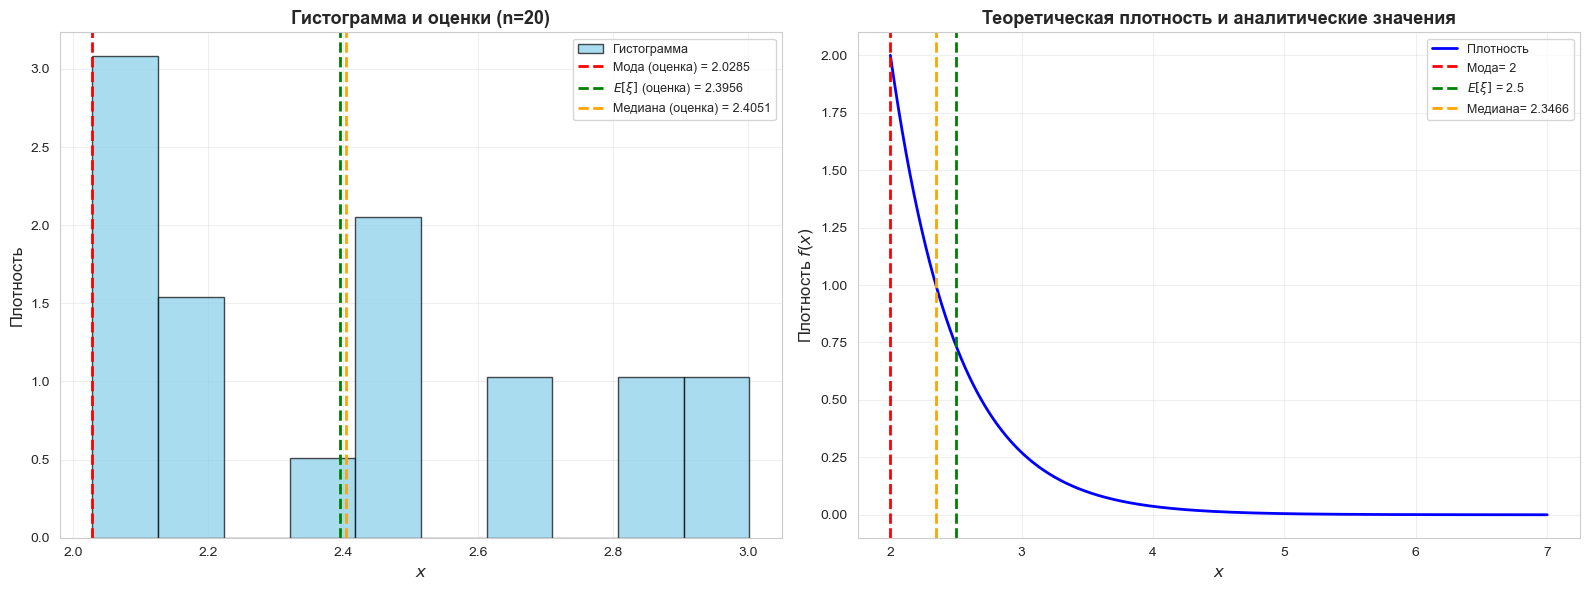

In [20]:
# Построение графиков для маленькой выборки
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Гистограмма с оценками
ax1 = axes[0]
ax1.hist(sample_small, bins=10, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Гистограмма')
ax1.axvline(mode_small, color='red', linestyle='--', linewidth=2, label=f'Мода (оценка) = {mode_small:.4f}')
ax1.axvline(E_small, color='green', linestyle='--', linewidth=2, label=f'$E[\\xi]$ (оценка) = {E_small:.4f}')
ax1.axvline(median_small, color='orange', linestyle='--', linewidth=2, label=f'Медиана (оценка) = {median_small:.4f}')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('Плотность', fontsize=12)
ax1.set_title(f'Гистограмма и оценки (n={n_small})', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# График 2: Теоретическая плотность с аналитическими значениями
ax2 = axes[1]
x_plot = np.linspace(a, a + 5, 1000)
y_plot = pdf_shifted_exp(x_plot, lambda_val, a)
ax2.plot(x_plot, y_plot, 'b-', linewidth=2, label='Плотность')
ax2.axvline(mode_analytical, color='red', linestyle='--', linewidth=2, label=f'Мода= {mode_analytical}')
ax2.axvline(E_analytical, color='green', linestyle='--', linewidth=2, label=f'$E[\\xi]$ = {E_analytical}')
ax2.axvline(median_analytical, color='orange', linestyle='--', linewidth=2, label=f'Медиана= {median_analytical:.4f}')
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('Плотность $f(x)$', fontsize=12)
ax2.set_title('Теоретическая плотность и аналитические значения', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab_2_task2_small.png', dpi=150, bbox_inches='tight')
plt.show()


### (d) Исследование сходимости медианы к математическому ожиданию


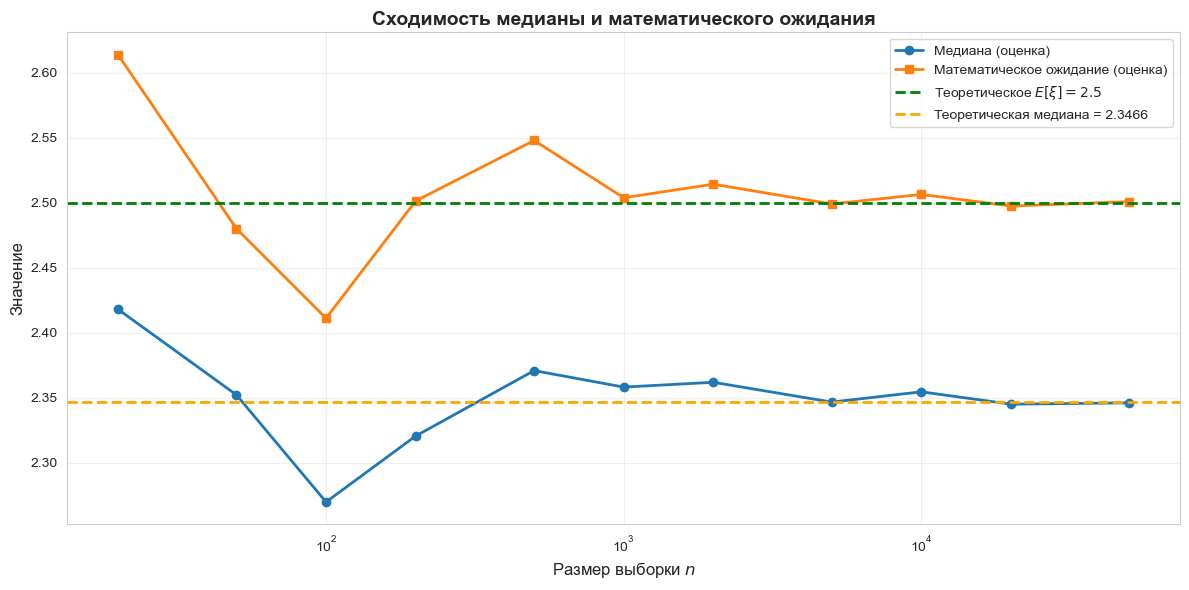


Вывод: Медиана сходится к своему теоретическому значению 2.3466,
а не к математическому ожиданию 2.5. Это нормально, так как
для сдвинутого экспоненциального распределения медиана ≠ E[ξ].


In [21]:
# Различные размеры выборок
sample_sizes = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

medians = []
means = []

for n in sample_sizes:
    sample = a + expon.rvs(scale=1/lambda_val, size=n)
    medians.append(np.median(sample))
    means.append(np.mean(sample))

# Построение графика
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(sample_sizes, medians, 'o-', label='Медиана (оценка)', linewidth=2, markersize=6)
ax.plot(sample_sizes, means, 's-', label='Математическое ожидание (оценка)', linewidth=2, markersize=6)
ax.axhline(y=E_analytical, color='green', linestyle='--', linewidth=2, label=f'Теоретическое $E[\\xi] = {E_analytical}$')
ax.axhline(y=median_analytical, color='orange', linestyle='--', linewidth=2, label=f'Теоретическая медиана = {median_analytical:.4f}')
ax.set_xlabel('Размер выборки $n$', fontsize=12)
ax.set_ylabel('Значение', fontsize=12)
ax.set_title('Сходимость медианы и математического ожидания', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('lab_2_task2_convergence.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nВывод: Медиана сходится к своему теоретическому значению {median_analytical:.4f},")
print(f"а не к математическому ожиданию {E_analytical}. Это нормально, так как")
print(f"для сдвинутого экспоненциального распределения медиана ≠ E[ξ].")


## Задание 3: Совместное распределение двух СВ


### Совместное распределение: $P(\xi = i, \eta = j) = c_i \cdot \frac{1}{2^j}$

где:
- $c_{-1} = c_1 = \frac{2}{5}$ (для $\xi = -1$ и $\xi = 1$)
- $c_0 = \frac{1}{5}$ (для $\xi = 0$)
- $\eta \in \mathbb{N} = \{1, 2, 3, \ldots\}$


In [22]:
xi_values = [-1, 0, 1]
c_values = { -1: 2/5, 0: 1/5, 1: 2/5 }


def joint_prob(xi, eta):
    return c_values[xi] * (1 / (2**eta))

E_xi_analytical = sum(xi * c_values[xi] for xi in xi_values)
E_eta_analytical = 2
E_xi_eta_analytical = 0
D_xi_analytical = sum(xi**2 * c_values[xi] for xi in xi_values)
E_eta_sq_analytical = 6
D_eta_analytical = E_eta_sq_analytical - E_eta_analytical**2
cov_analytical = 0
corr_coef_analytical = cov_analytical / np.sqrt(D_xi_analytical * D_eta_analytical)

print("Аналитические значения:")
print(f"E[ξ] = {E_xi_analytical}")
print(f"E[η] = {E_eta_analytical}")
print(f"D[ξ] = {D_xi_analytical}")
print(f"D[η] = {D_eta_analytical}")
print(f"cov(ξ, η) = {cov_analytical}")
print(f"\nКовариационная матрица:")
K_analytical = np.array([[D_xi_analytical, cov_analytical], 
                         [cov_analytical, D_eta_analytical]])
print(K_analytical)
print(f"\nКорреляционная матрица:")
R_analytical = np.array([[1, corr_coef_analytical], 
                         [corr_coef_analytical, 1]])
print(R_analytical)


Аналитические значения:
E[ξ] = 0.0
E[η] = 2
D[ξ] = 0.8
D[η] = 2
cov(ξ, η) = 0

Ковариационная матрица:
[[0.8 0. ]
 [0.  2. ]]

Корреляционная матрица:
[[1. 0.]
 [0. 1.]]


In [23]:
def generate_joint_sample(n):
    sample_xi = []
    sample_eta = []
    
    for _ in range(n):
        xi = np.random.choice(xi_values, p=[c_values[-1], c_values[0], c_values[1]])
        u = np.random.uniform(0, 1)
        eta = int(np.ceil(-np.log2(1 - u)))
        if eta < 1:
            eta = 1
        sample_xi.append(xi)
        sample_eta.append(eta)
    return np.array(sample_xi), np.array(sample_eta)


n_sample = 100000
xi_sample, eta_sample = generate_joint_sample(n_sample)
E_xi_est = np.mean(xi_sample)
E_eta_est = np.mean(eta_sample)
D_xi_est = np.var(xi_sample, ddof=0)
D_eta_est = np.var(eta_sample, ddof=0)
cov_est = np.mean((xi_sample - E_xi_est) * (eta_sample - E_eta_est))
K_est = np.array([[D_xi_est, cov_est], 
                  [cov_est, D_eta_est]])

corr_coef_est = cov_est / np.sqrt(D_xi_est * D_eta_est)
R_est = np.array([[1, corr_coef_est], 
                  [corr_coef_est, 1]])

print(f"Оценки на основе выборки размера {n_sample}:")
print(f"E[ξ] ≈ {E_xi_est:.6f} (теоретическое: {E_xi_analytical})")
print(f"E[η] ≈ {E_eta_est:.6f} (теоретическое: {E_eta_analytical})")
print(f"D[ξ] ≈ {D_xi_est:.6f} (теоретическое: {D_xi_analytical})")
print(f"D[η] ≈ {D_eta_est:.6f} (теоретическое: {D_eta_analytical})")
print(f"cov(ξ, η) ≈ {cov_est:.6f} (теоретическое: {cov_analytical})")
print(f"\nОценка ковариационной матрицы:")
print(K_est)
print(f"\nОценка корреляционной матрицы:")
print(R_est)
print(f"\nСравнение с аналитическими значениями:")
print(f"\nАналитическая ковариационная матрица:")
print(K_analytical)
print(f"\nАналитическая корреляционная матрица:")
print(R_analytical)


Оценки на основе выборки размера 100000:
E[ξ] ≈ -0.004920 (теоретическое: 0.0)
E[η] ≈ 2.004470 (теоретическое: 2)
D[ξ] ≈ 0.799996 (теоретическое: 0.8)
D[η] ≈ 2.013570 (теоретическое: 2)
cov(ξ, η) ≈ -0.001908 (теоретическое: 0)

Оценка ковариационной матрицы:
[[ 7.99995794e-01 -1.90800760e-03]
 [-1.90800760e-03  2.01357002e+00]]

Оценка корреляционной матрицы:
[[ 1.         -0.00150333]
 [-0.00150333  1.        ]]

Сравнение с аналитическими значениями:

Аналитическая ковариационная матрица:
[[0.8 0. ]
 [0.  2. ]]

Аналитическая корреляционная матрица:
[[1. 0.]
 [0. 1.]]
